In [2]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import scipy.special as spe
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [94]:
n = [1000, 10000, 100000]
for ni in n:
    c = 0
    for i in range(ni):
        r = rand.rand(1,5)
        if np.sum(r>=0.5) == 3:
            c = c+1
    print(c/ni)

0.301
0.3088
0.31354


In [54]:
spe.comb(5,3)/sum([spe.comb(5,i) for i in range(6)])

0.3125

In [88]:
np.apply_along_axis(lambda x: 1 if x>= 0.5 else 0, 0, rand.rand(1,2))

array([1, 0])

In [102]:
n = [1000, 10000, 100000]
for ni in n:
    c = 0
    for i in range(ni):
        r = rand.rand(1,2)
        res = np.apply_along_axis(lambda x: 1 if x>= 0.5 else 0, 0, r)
        if res[0] == res[1]:
            c = c+1
        else:
            c = c-1
    print(c)

-16
-116
292


In [104]:
pop = pd.read_csv('pop.csv')

In [106]:
m=282000000

In [107]:
pop['ln'] = np.log(pop['pop']/(m-pop['pop']))

In [109]:
pop.head()

,year,pop,ln
0,1790,3929000,-4.259492
1,1800,5308000,-3.953690
2,1810,7240000,-3.636277
3,1820,9638000,-3.341418
4,1830,12866000,-3.040621


In [141]:
lr = LinearRegression()
lr.fit(np.arange(pop.shape[0]).reshape(-1, 1), pop['ln'])
# lr.fit(np.array(pop['year']).reshape(-1, 1), pop['ln'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
lr.intercept_

-4.553846621416567

In [143]:
lr.coef_[0]/282000000

1.2085758926955586e-09

Text(0, 0.5, 'ln(P/(M-P))')

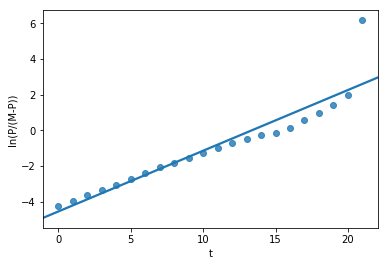

In [130]:
ax = sns.regplot(x=np.arange(pop.shape[0]), y=pop['ln'], ci=None);
plt.xlabel('t')
plt.ylabel('ln(P/(M-P))')

In [145]:
t = 0-1/0.34*np.log(3929000/(282000000-3929000))

In [147]:
1790+10*t

1915.279162829113

In [148]:
282000000/(1+np.log(-0.34*(6.1-12.53)))

158234517.837694

Text(0, 0.5, 'dx/dt')

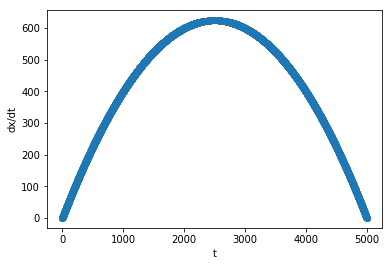

In [43]:
k = 0.0001
N = 5000
dxdt = lambda x: k * x * (N - x)
xs = np.arange(N+1)
plt.scatter(xs, dxdt(xs))
plt.xlabel('t')
plt.ylabel('dx/dt')

In [16]:
x = 1000
t = 0
xs = [x]
ts = [t]
while(x < N):
    delta = np.int(np.ceil(dxdt(x)))
    x = x+delta
    t = t+1
    xs.append(x)
#     print(x)
    ts.append(t)

Text(0, 0.5, 'X')

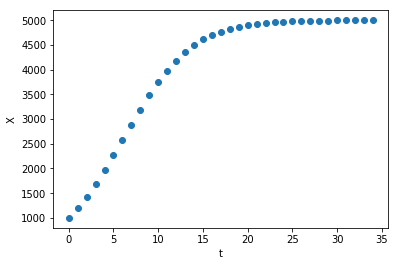

In [17]:
plt.scatter(ts, xs)
plt.xlabel('t')
plt.ylabel('X')

In [18]:
x = 4000
t = 0
xs = [x]
ts = [t]
while(x < N):
    delta = np.int(np.ceil(dxdt(x)))
    x = x+delta
    t = t+1
    xs.append(x)
#     print(x)
    ts.append(t)

Text(0, 0.5, 'X')

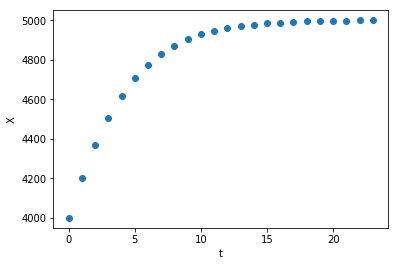

In [19]:
plt.scatter(ts, xs)
plt.xlabel('t')
plt.ylabel('X')

In [23]:
xt = lambda t: N * x0 / (x0 + (N-x0) * np.exp(-k*N*t))

In [40]:
x0 = 1344
xt(2)

1886.8580966374693

In [41]:
np.exp(-0.5)

0.6065306597126334

In [44]:
dxdt(4853)

71.3391

In [45]:
4853+71

4924

In [46]:
dxdt(4924)

37.4224

In [47]:
4924+37

4961